In [2]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import pickle as pkl


## Load pkl data

In [3]:

poptypeNumber = 55 # max 55
celltypeNumber = 207 # max 207

#------------------------------------------------------------------------------  
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('cells/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
popParam = []
cellParam = []
meParamLabels = {} 
popLabelEl = {} 
cellLabel = {}

RP_L13 = []
RP_L45 = []
RP_L6 = []

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popNumber[mtype] = int(m)
    cellLabel[metype] = cellname

    if mtype not in popParam:
        popParam.append(mtype)
        popLabelEl[mtype] = [] 
               
    popLabelEl[mtype].append(metype)
    
    cellParam.append(mtype + '_' + etype[0:3])

    layernumber = float(metype[1:2])
    if cellNumber[metype]*0.01 > 0.0:
        if int(layernumber) <= 3:
            RP_L13.append(mtype + '_' + etype[0:3])
            # print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        elif int(layernumber) == 6:
            RP_L6.append(mtype + '_' + etype[0:3])
            # print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        else:
            RP_L45.append(mtype + '_' + etype[0:3])
            # print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
    
S1pops = popParam[0:55]
S1cells = cellParam[0:207]

Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

Ipops = []
for mtype in S1pops: # mtype              
    if mtype not in Epops:
        Ipops.append(mtype)  

Ecells = [] 
Icells = [] 
for metype in S1cells: # metype      
    mtype = popLabel[metype]            
    if mtype in Epops:  
        Ecells.append(metype)      
    else:  
        Icells.append(metype)


In [5]:
filename = '/home/fernando/Dropbox/SUNY/2024/Extracellular_stimulation_tests/v1_batch2/v1_batch2_0_data.pkl'

sim.load(filename, instantiate=True, instantiateConns = False, instantiateStims = False, instantiateRxD = False, createNEURONObj = False)

## Traces

Plotting recorded cell traces ... trace


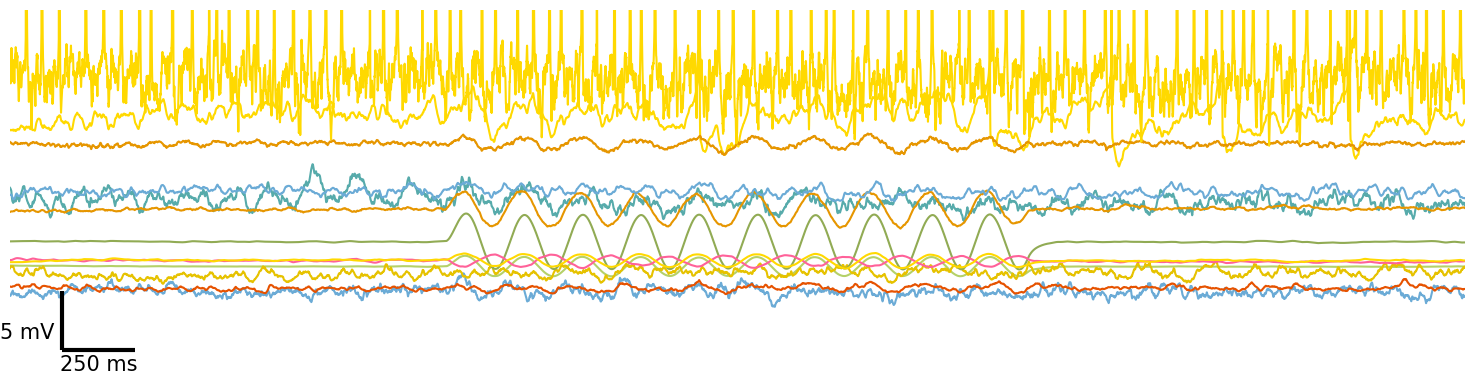

In [22]:
timeRange=[500, 5500]

sim.analysis.plotTraces(include=Ecells, timeRange=timeRange, overlay=True, oneFigPer='trace', subtitles=False, legend=True, ylim=[-80,-50], 
    axis=False, scaleBarLoc=3, figSize=(15, 4), fontSize=15, saveFig = filename[:-4] + '_Exc_Vt.png');              

Plotting recorded cell traces ... trace


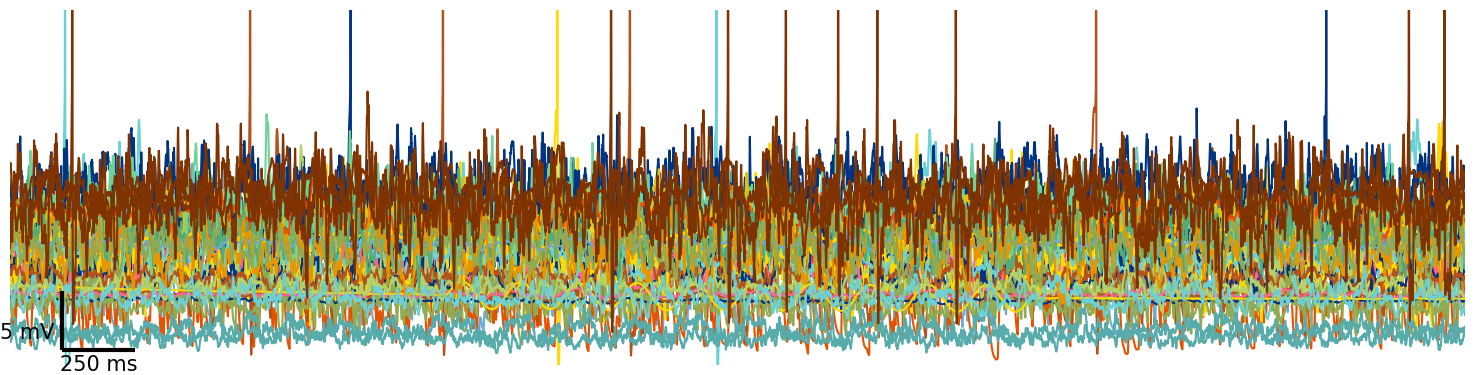

In [ ]:
sim.analysis.plotTraces(include=Icells[14:56], timeRange=timeRange, overlay=True, oneFigPer='trace', subtitles=False, legend=True, ylim=[-80,-50], 
    axis=False, scaleBarLoc=3, figSize=(15, 4), fontSize=15, saveFig = filename[:-4] + '_Exc_Vt.png');        

Plotting recorded cell traces ... trace


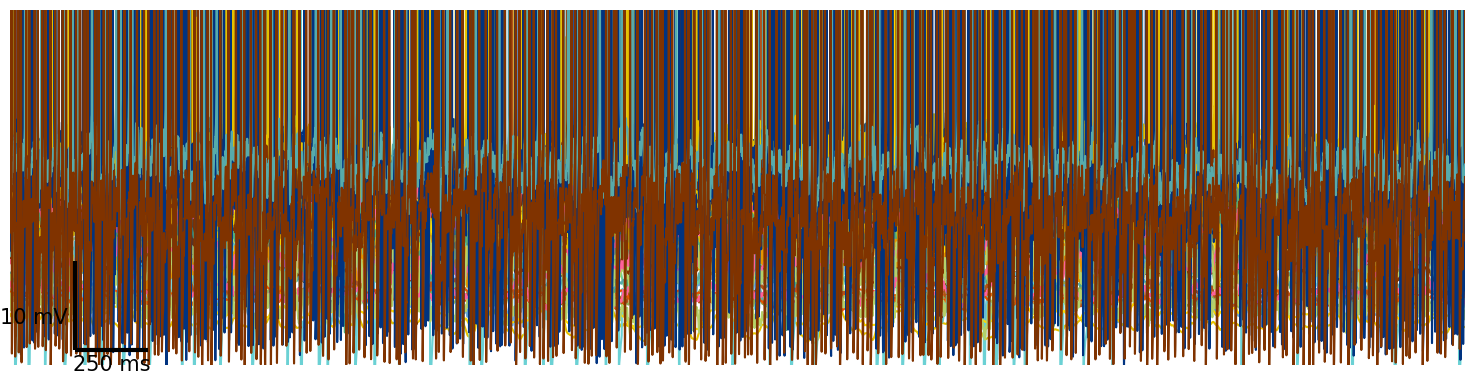

In [ ]:
sim.analysis.plotTraces(include=Icells[56:99], timeRange=timeRange, overlay=True, oneFigPer='trace', subtitles=False, legend=True, ylim=[-80,-40], 
    axis=False, scaleBarLoc=3, figSize=(15, 4), fontSize=15, saveFig = filename[:-4] + '_Exc_Vt.png');

Plotting recorded cell traces ... trace


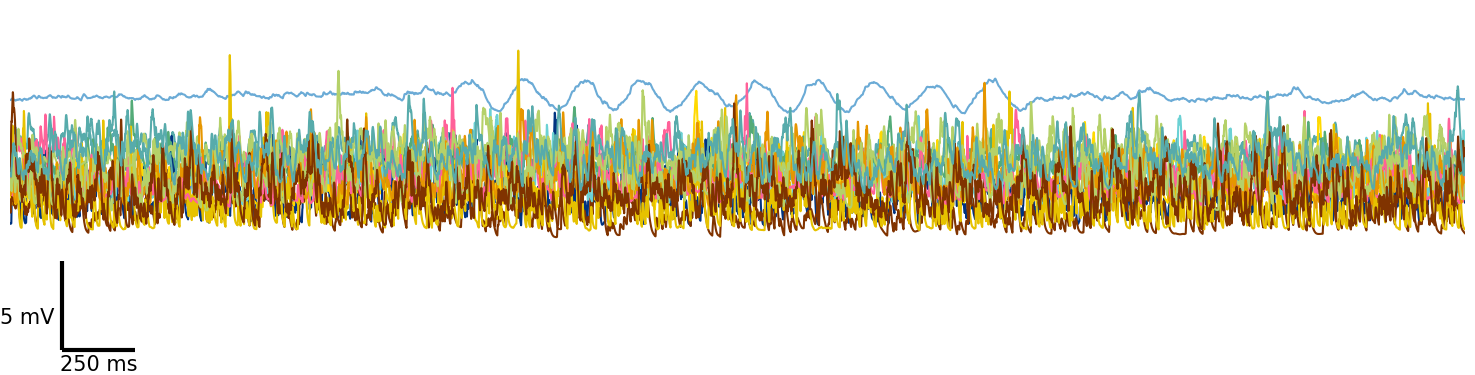

In [ ]:
sim.analysis.plotTraces(include=Icells[0:14], timeRange=timeRange, overlay=True, oneFigPer='trace', subtitles=False, legend=True, ylim=[-87,-67], 
    axis=False, scaleBarLoc=3, figSize=(15, 4), fontSize=15, saveFig = filename[:-4] + '_Exc_Vt.png');
        

In [24]:
# for mtype in Ipops:
#     # print('\n\n',mtype,'  N =',popNumber[mtype])
#     sim.analysis.plotTraces(include=popLabelEl[mtype], timeRange=timeRange, overlay=True, oneFigPer='trace', subtitles=False, legend=False, ylim=[-80,-50], 
#     axis=False, scaleBarLoc=3, figSize=(24, 2), fontSize=15, saveFig = filename[:-4] + '_' + mtype+ '_Vt.png');
        

Plotting recorded cell traces ... trace


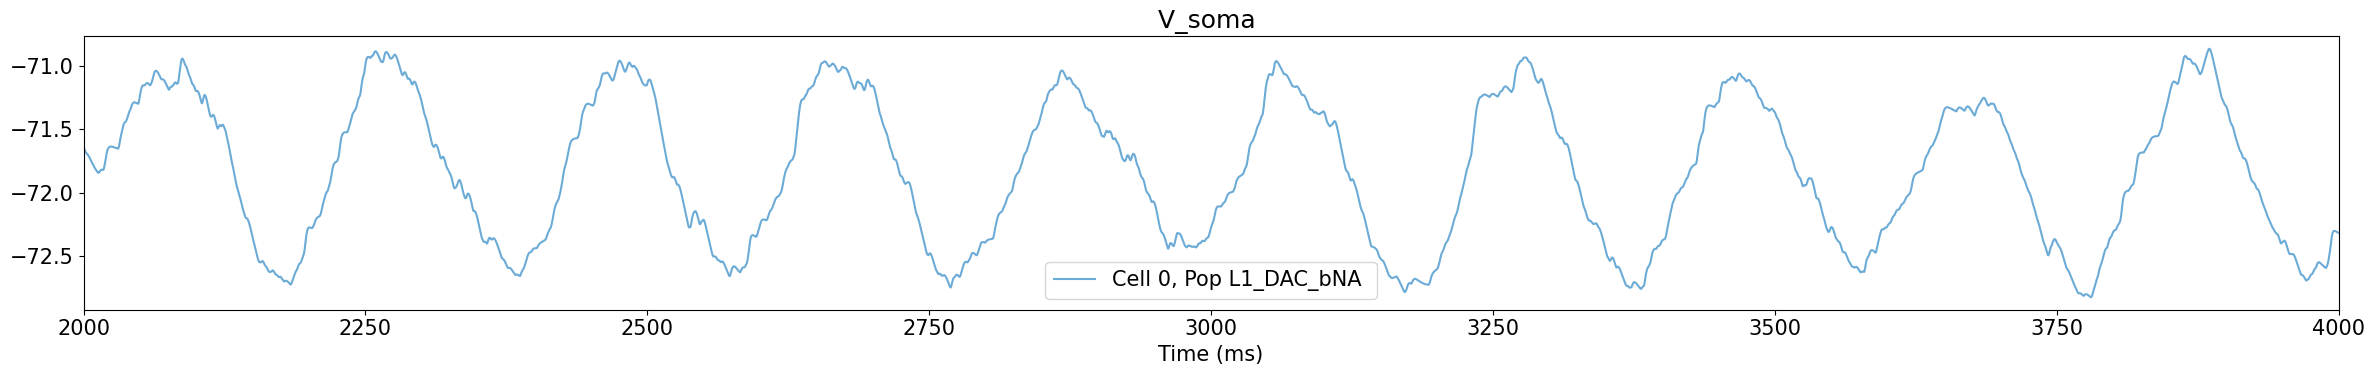

In [ ]:
sim.analysis.plotTraces(include=['L1_DAC_bNA'], overlay=True, timeRange = [2000,4000], oneFigPer='trace', figSize=(24,4), fontSize=15, saveFig=False);

## Histrogram of Spikes per pop

In [28]:
# sim.analysis.plotSpikeHist(include=[Icells[0:14]], binSize=25, figSize=(16, 4), timeRange=[2000, 4000], dpi=300, saveFig=filename[:-4] + '_L1_hist_2sec.png')

Preparing spike data...
Plotting spike frequency...


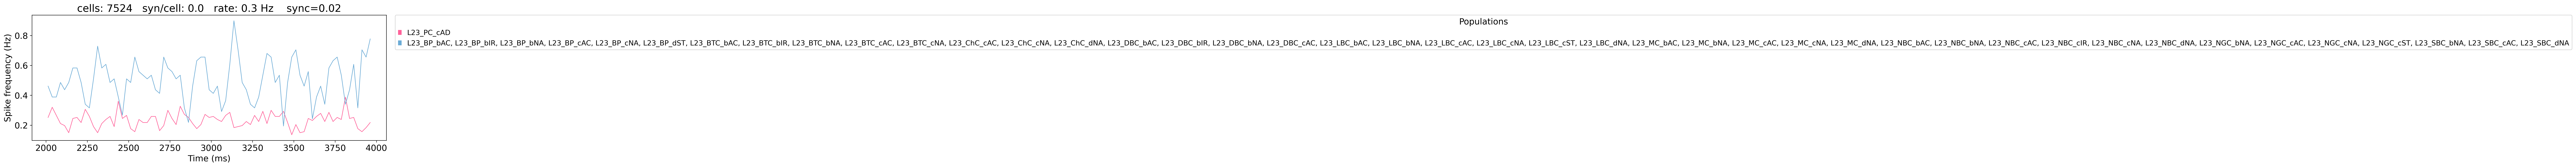

In [9]:
sim.analysis.plotSpikeHist(include=[Ecells[0:1],Icells[14:56]], binSize=25, figSize=(16, 4), timeRange=[2000, 4000], dpi=300, saveFig=filename[:-4] + '_L23_hist_2sec.png')

Preparing spike data...
Plotting spike frequency...
Preparing spike data...
Plotting spike frequency...


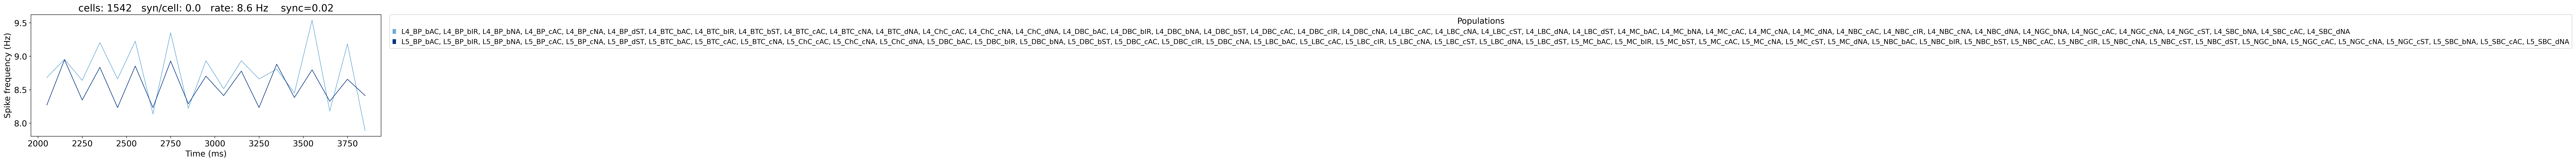

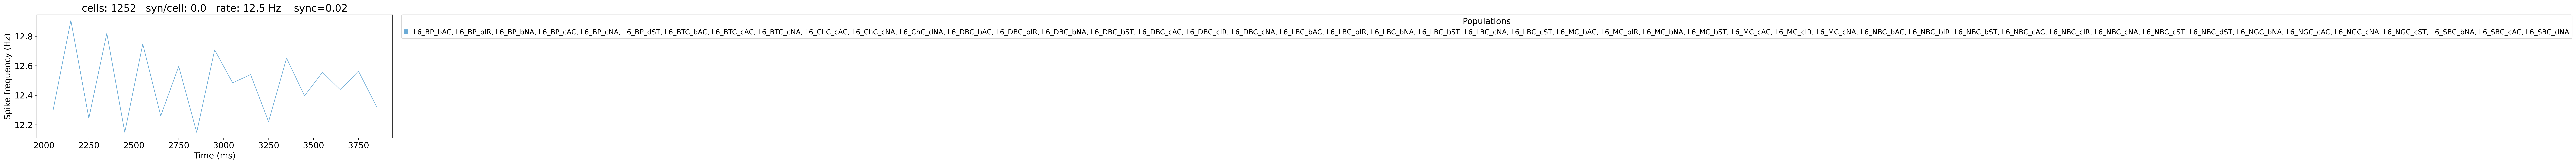

In [10]:
sim.analysis.plotSpikeHist(include=[Icells[56:99],Icells[99:147]], binSize=100, figSize=(16, 4), timeRange=[2000, 4000], dpi=300, saveFig=filename[:-4] + '_L45Ipops_hist_1sec.png')
sim.analysis.plotSpikeHist(include=[Icells[147:]], binSize=100, figSize=(16, 4), timeRange=[2000, 4000], dpi=300, saveFig=filename[:-4] + '_L6Ipops_hist_1sec.png')

Preparing spike data...
Plotting spike frequency...


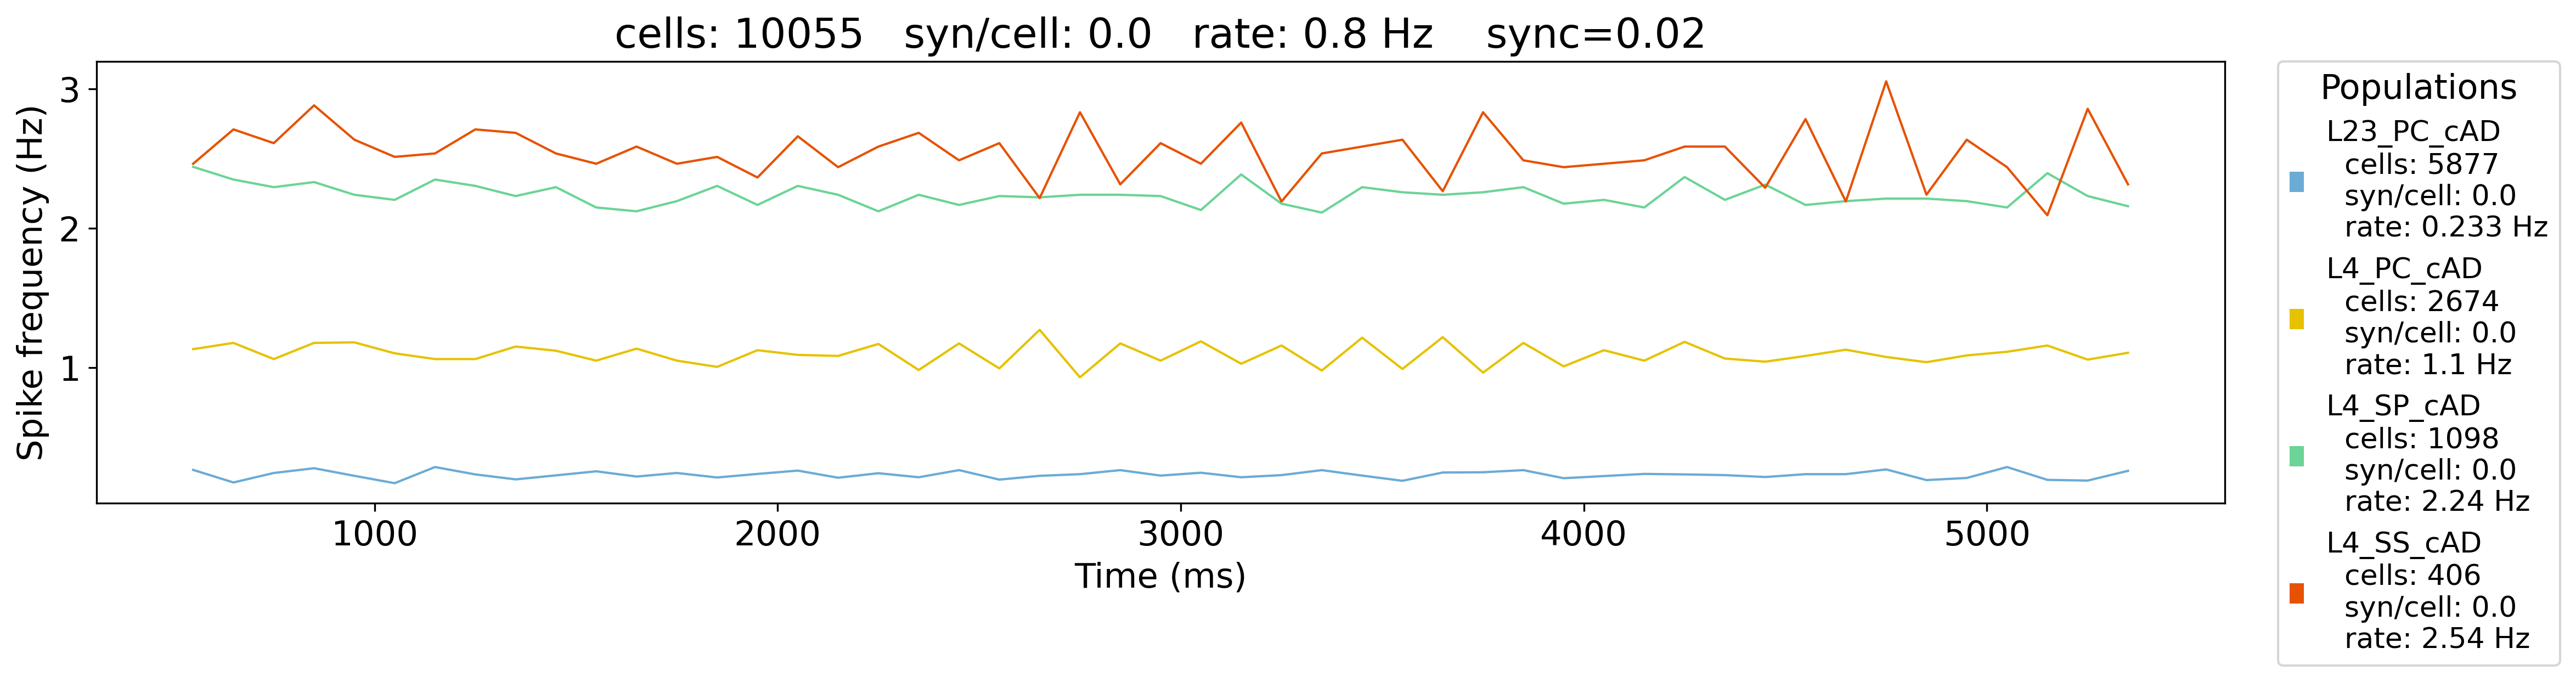

In [11]:
sim.analysis.plotSpikeHist(include=Ecells[0:4], binSize=100, figSize=(16, 4), timeRange=[500, 5500], dpi=300, saveFig=filename[:-4] + '_Epops_hist_1sec.png')

Preparing spike data...
Plotting spike frequency...


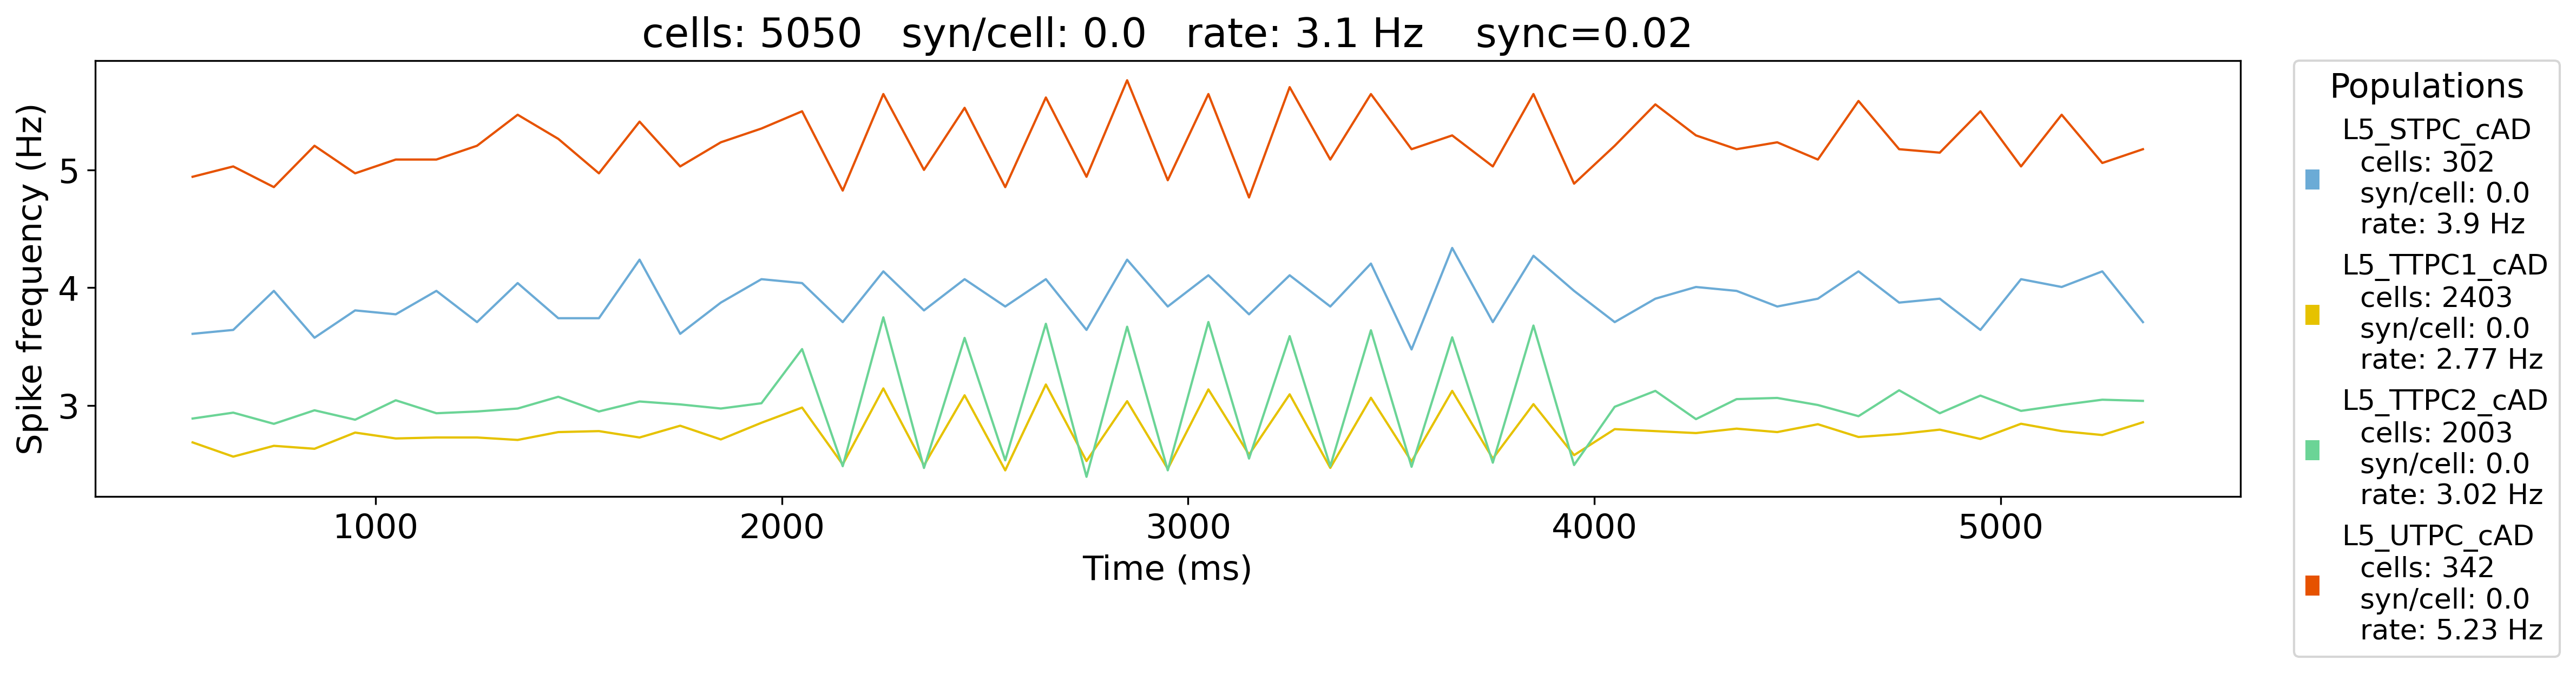

In [12]:
sim.analysis.plotSpikeHist(include=Ecells[4:8], binSize=100, figSize=(16, 4), timeRange=[500, 5500], dpi=300, saveFig=filename[:-4] + '_Epops_hist_1sec.png')

In [13]:
# for ii in range(2):
#     hhh = sim.analysis.plotSpikeHist(include=Ecells[ii:ii+1], binSize=50, figSize=(16, 4), timeRange=[2000, 3000], fontSize=2, dpi=100, saveFig=filename[:-4] + '_Epops_hist_1sec.png')

Preparing spike data...
Plotting spike frequency...
Preparing spike data...
Plotting spike frequency...


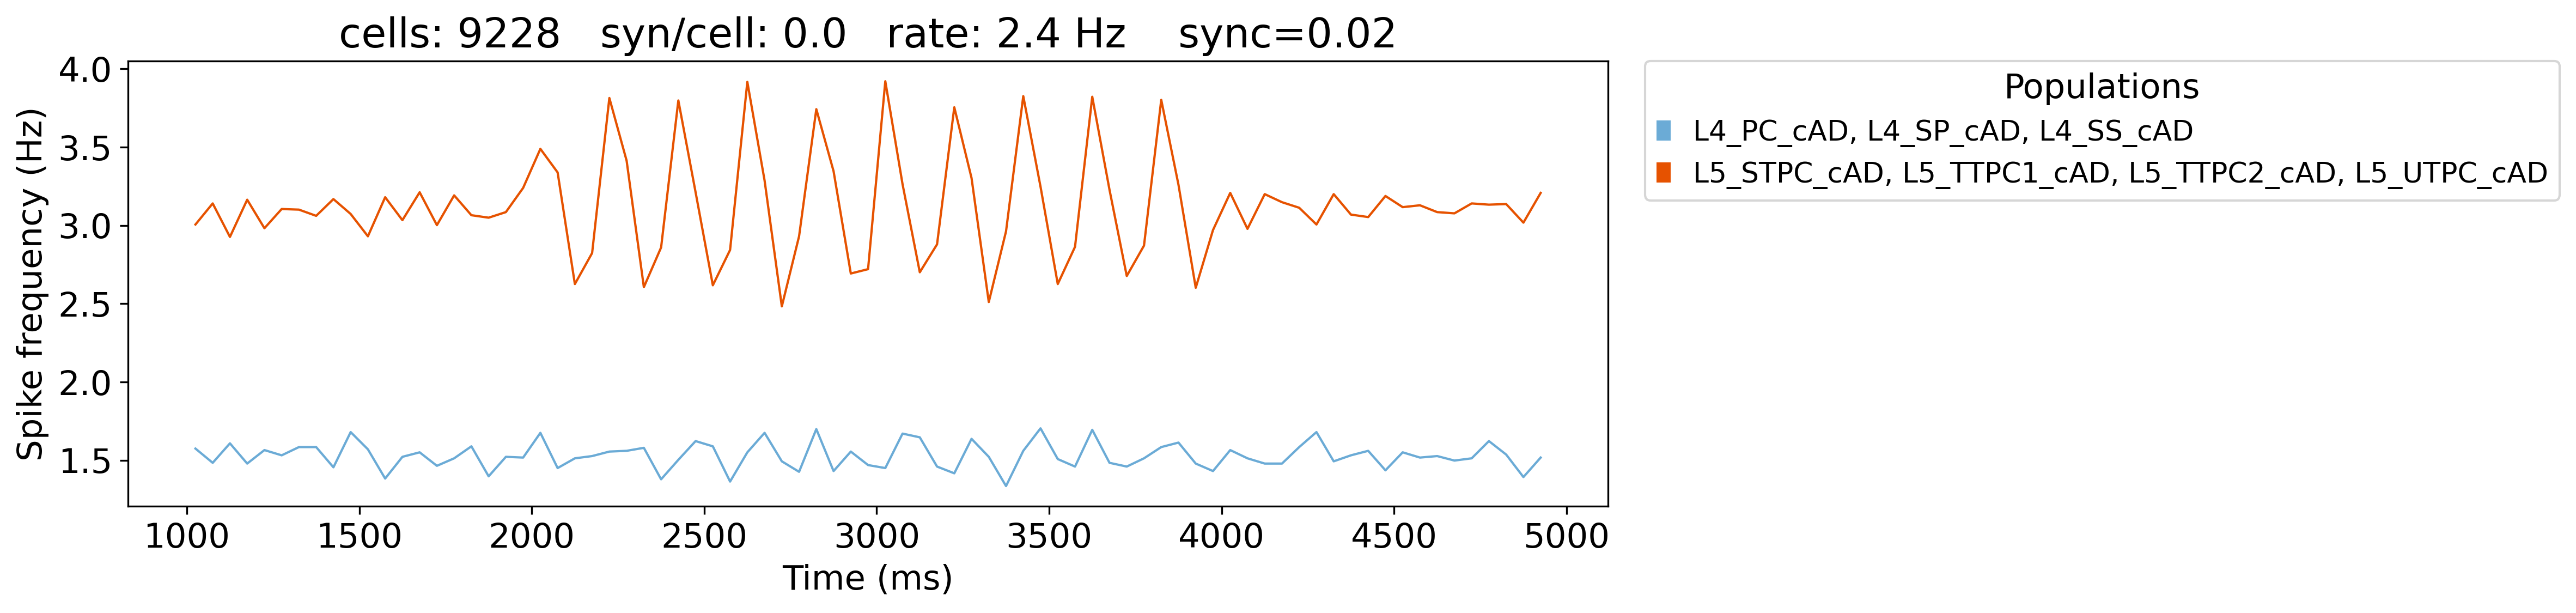

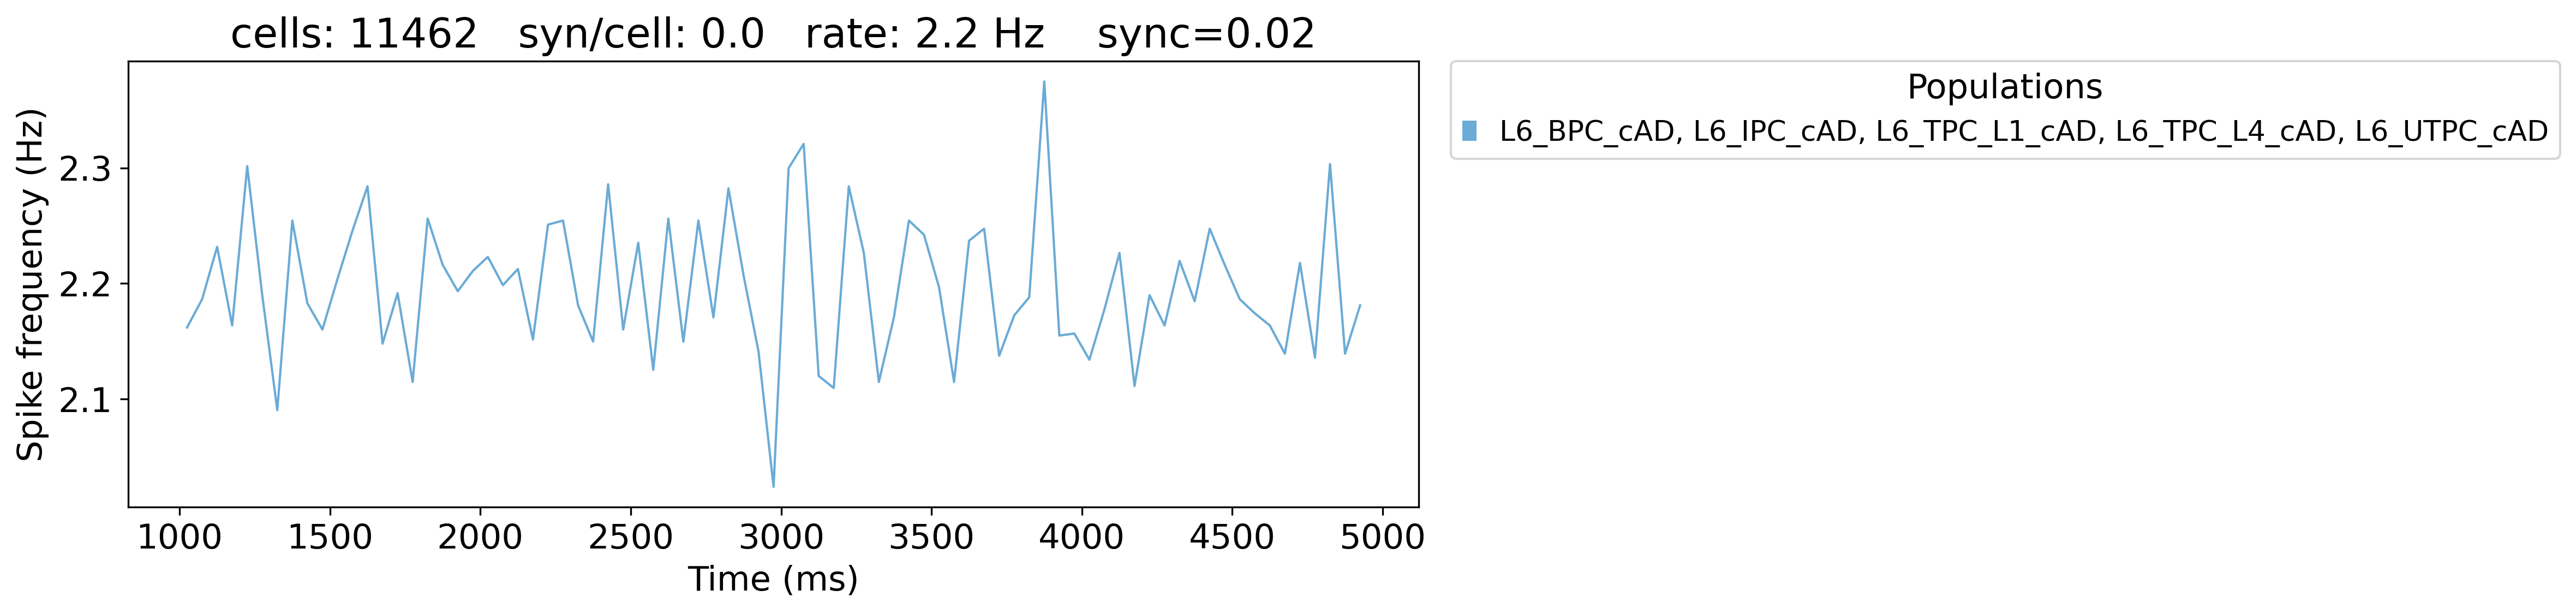

In [29]:
sim.analysis.plotSpikeHist(include=[Ecells[1:4],Ecells[4:8]], binSize=50, figSize=(16, 4), timeRange=[1000, 5000], dpi=300, saveFig=filename[:-4] + '_L45Epops_hist_1sec.png')
sim.analysis.plotSpikeHist(include=[Ecells[8:]], binSize=50, figSize=(16, 4), timeRange=[1000, 5000], dpi=300, saveFig=filename[:-4] + '_L6Epops_hist_1sec.png')

Preparing spike data...
Plotting raster...
Preparing spike data...
Plotting raster...
Preparing spike data...
Plotting raster...


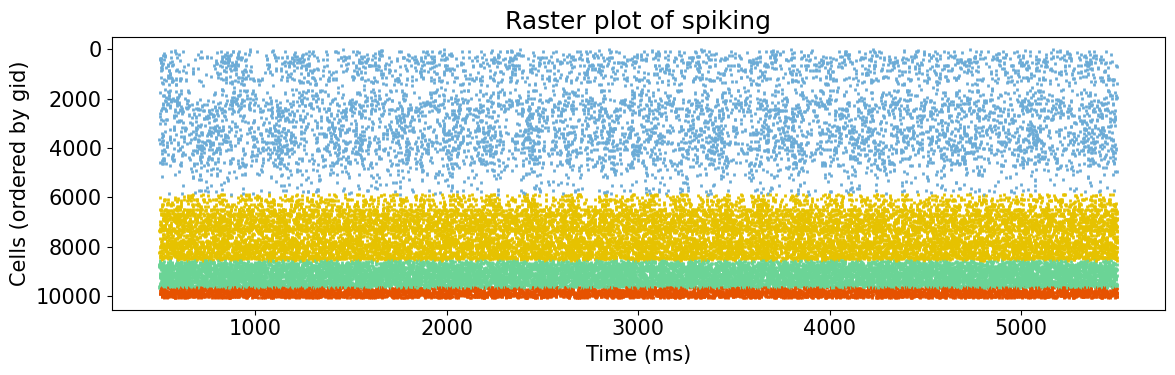

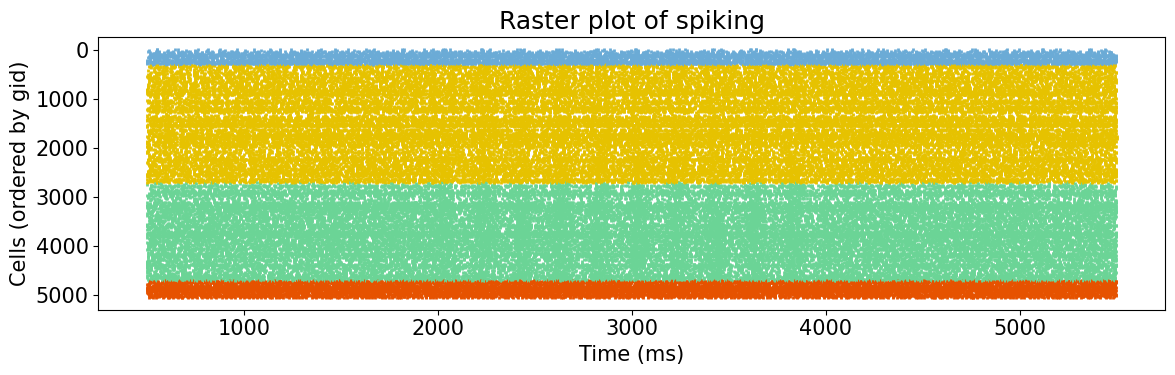

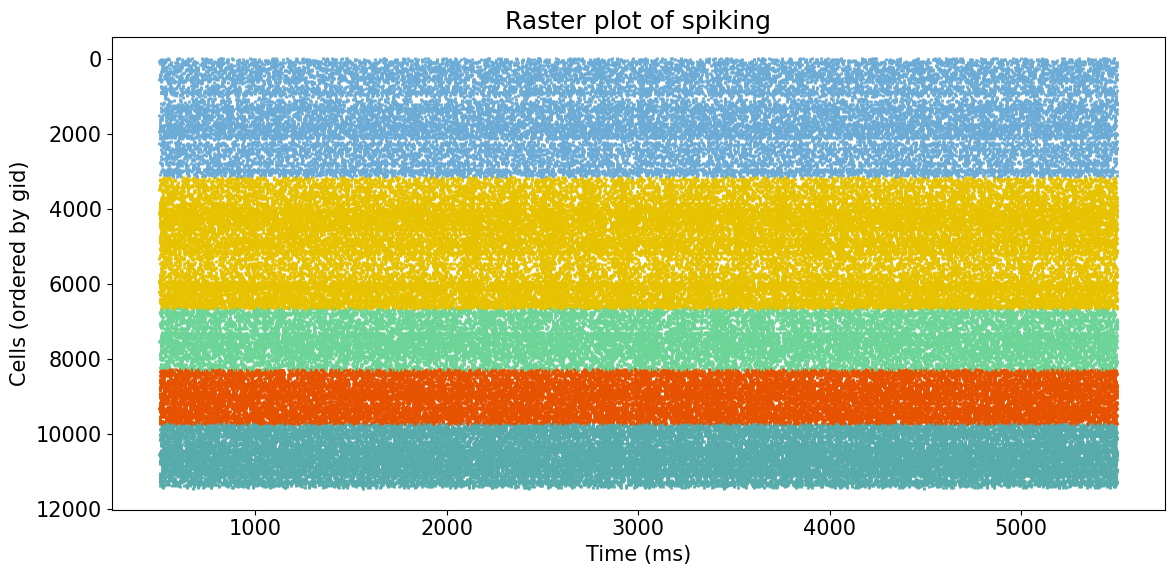

In [20]:
sim.analysis.plotRaster(include = Ecells[:4], timeRange = [500,5500], labels = None, orderInverse = True, popRates = False, figSize=(12,4), fontSize=15, saveFig=False)
sim.analysis.plotRaster(include = Ecells[4:8], timeRange = [500,5500], labels = None, orderInverse = True, popRates = False, figSize=(12,4), fontSize=15, saveFig=False)
sim.analysis.plotRaster(include = Ecells[8:], timeRange = [500,5500], labels = None, orderInverse = True, popRates = False, figSize=(12,6), fontSize=15, saveFig=False)

In [21]:
# sim.analysis.plotTraces(overlay=True, ylim = [-80.0, 50.0], timeRange =[3000.0, 3200],  oneFigPer='trace', figSize=(12,12), fontSize=12, saveFig=False);